In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [150]:
mrestate=pd.read_csv('mrestate.csv')

In [151]:
mrestate

,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,floor
0,جردن,کلنگی,358.0,NaN,0,NaN,197000000000,NaN,NaN
1,جنت آباد مرکزی,کلنگی,260.0,6.0,0,32.0,62000000000,NaN,NaN
2,محمودیه,کلنگی,650.0,NaN,0,NaN,325000000000,NaN,NaN
3,قیطریه,کلنگی,580.0,6.0,3,32.0,174000000000,NaN,6.0
4,ولنجک,کلنگی,200.0,NaN,0,30.0,59500000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
50499,جنت آباد شمالی,آپارتمان,82.0,2.0,1,10.0,7400000000,"آسانسور,انباری,بالکن",2.0
50500,شهرک نفت,آپارتمان,83.0,2.0,1,19.0,6800000000,"انباری,بالکن",2.0
50501,پونک,آپارتمان,90.0,2.0,1,10.0,9200000000,"آسانسور,انباری,بالکن",2.0
50502,بلوار فردوس,آپارتمان,100.0,2.0,1,20.0,8950000000,"آسانسور,انباری,بالکن",2.0


In [152]:
mrestate.describe()

,real_estate_area,total_rooms,number_of_parking,real_estate_age,floor
count,5.014900e+04,45637.000000,50504.000000,46958.000000,37810.000000
mean,3.508912e+04,2.561189,0.948578,95.939989,2.146258
std,6.758619e+06,2.306080,1.140519,335.041882,0.881260
min,1.000000e+00,1.000000,0.000000,-86.000000,1.000000
25%,7.000000e+01,2.000000,1.000000,2.000000,2.000000
50%,1.030000e+02,2.000000,1.000000,9.000000,2.000000
75%,1.550000e+02,3.000000,1.000000,18.000000,3.000000
max,1.500000e+09,30.000000,90.000000,1401.000000,6.000000


In [153]:
mrestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50504 entries, 0 to 50503
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district_name      50504 non-null  object 
 1   real_estate_type   50504 non-null  object 
 2   real_estate_area   50149 non-null  float64
 3   total_rooms        45637 non-null  float64
 4   number_of_parking  50504 non-null  int64  
 5   real_estate_age    46958 non-null  float64
 6   price              50504 non-null  object 
 7   facilities         42934 non-null  object 
 8   floor              37810 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.5+ MB


In [154]:
filtered_data = mrestate[mrestate['price'] == 'توافقی']
filtered_data

,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,floor
7,ونک,کلنگی,600.0,NaN,0,NaN,توافقی,"آسانسور,انباری",NaN
10,آرژانتین,کلنگی,NaN,NaN,0,NaN,توافقی,"آسانسور,انباری",NaN
13,لواسان,ویلا,600.0,4.0,1,9.0,توافقی,انباری,NaN
18,سعادت آباد,کلنگی,200.0,NaN,0,NaN,توافقی,NaN,NaN
21,سعادت آباد,کلنگی,250.0,NaN,0,NaN,توافقی,NaN,NaN
...,...,...,...,...,...,...,...,...,...
50233,آذربایجان,آپارتمان,63.0,1.0,0,27.0,توافقی,NaN,1.0
50285,اندرزگو,آپارتمان,225.0,3.0,2,1.0,توافقی,"آسانسور,انباری,بالکن,سرایداری,نگهبانی,سالن اجت...",3.0
50373,جردن,آپارتمان,135.0,3.0,1,1.0,توافقی,"آسانسور,انباری,بالکن,سرایداری,نگهبانی,سالن اجت...",3.0
50465,جنت آباد جنوبی,آپارتمان,85.0,2.0,1,1.0,توافقی,"آسانسور,انباری,بالکن",2.0


In [155]:
mrestate.drop(mrestate[mrestate["price"] == 'توافقی'].index, inplace=True)
mrestate.reset_index(drop=True, inplace=True)
mrestate.sort_values(['price'])

,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,floor
3151,محله,کلنگی,200.0,NaN,0,NaN,1,NaN,NaN
13896,نیاوران,برج,220.0,3.0,3,2.0,1,"آسانسور,انباری,بالکن,سرایداری,نگهبانی,سالن اجت...",3.0
13894,فرمانیه,برج,200.0,3.0,2,3.0,1,"آسانسور,انباری,بالکن,سرایداری,نگهبانی,سالن اجت...",3.0
17793,جنت آباد مرکزی,مستغلات,580.0,6.0,8,32.0,1,"انباری,بالکن,پارکینگ مهمان",6.0
13786,الهیه,برج,325.0,3.0,3,3.0,1,"آسانسور,انباری,بالکن,سرایداری,نگهبانی,سالن اجت...",3.0
...,...,...,...,...,...,...,...,...,...
18827,گیشا,آپارتمان,80.0,2.0,1,15.0,9995000000,"آسانسور,انباری,بالکن,روف گاردن,جاروبرقی مرکزی",2.0
33887,دارآباد,آپارتمان,68.0,1.0,1,8.0,9999999999,"آسانسور,انباری",1.0
3563,لواسان,ویلا,45.0,1.0,1,3.0,999999999999,"آسانسور,انباری",NaN
5986,نیاوران,برج,2953.0,NaN,0,1.0,999999999999,NaN,NaN


In [156]:
mrestate["price"]=mrestate["price"].astype(float)

In [157]:
mrestate['price_per_metre']=mrestate["price"]/mrestate['real_estate_area']

In [158]:
mrestate

,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,floor,price_per_metre
0,جردن,کلنگی,358.0,NaN,0,NaN,1.970000e+11,NaN,NaN,5.502793e+08
1,جنت آباد مرکزی,کلنگی,260.0,6.0,0,32.0,6.200000e+10,NaN,NaN,2.384615e+08
2,محمودیه,کلنگی,650.0,NaN,0,NaN,3.250000e+11,NaN,NaN,5.000000e+08
3,قیطریه,کلنگی,580.0,6.0,3,32.0,1.740000e+11,NaN,6.0,3.000000e+08
4,ولنجک,کلنگی,200.0,NaN,0,30.0,5.950000e+10,NaN,NaN,2.975000e+08
...,...,...,...,...,...,...,...,...,...,...
47528,جنت آباد شمالی,آپارتمان,82.0,2.0,1,10.0,7.400000e+09,"آسانسور,انباری,بالکن",2.0,9.024390e+07
47529,شهرک نفت,آپارتمان,83.0,2.0,1,19.0,6.800000e+09,"انباری,بالکن",2.0,8.192771e+07
47530,پونک,آپارتمان,90.0,2.0,1,10.0,9.200000e+09,"آسانسور,انباری,بالکن",2.0,1.022222e+08
47531,بلوار فردوس,آپارتمان,100.0,2.0,1,20.0,8.950000e+09,"آسانسور,انباری,بالکن",2.0,8.950000e+07


In [159]:
mrestate.real_estate_type.unique()

array(['کلنگی', 'سوئیت', 'زمین', 'ویلا', 'پنت هاوس', 'برج', 'آپارتمان',
       'مستغلات'], dtype=object)

In [160]:
index_estate_type=mrestate[(mrestate['real_estate_type']=='آپارتمان')|(mrestate['real_estate_type']=='برج')].index
residental_mre=mrestate.loc[index_estate_type,:].copy()
residental_mre

,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,floor,price_per_metre
4881,چیتگر,برج,100.0,2.0,1,0.0,7.000000e+08,"آسانسور,انباری,بالکن,سرایداری,نگهبانی,سالن اجت...",2.0,7.000000e+06
4882,پونک,برج,151.0,3.0,1,0.0,2.038900e+10,"آسانسور,انباری,بالکن,سرایداری,نگهبانی,سالن اجت...",3.0,1.350265e+08
4883,چیتگر,برج,120.0,3.0,1,0.0,1.800000e+09,"آسانسور,انباری,بالکن,سرایداری,نگهبانی,سالن اجت...",3.0,1.500000e+07
4884,ولنجک,برج,250.0,3.0,2,6.0,6.750000e+10,"آسانسور,انباری,بالکن,سرایداری,نگهبانی,سالن اجت...",3.0,2.700000e+08
4885,دریاچه خلیج فارس,برج,120.0,3.0,2,0.0,8.400000e+08,"آسانسور,انباری,بالکن,سرایداری,نگهبانی,سالن اجت...",NaN,7.000000e+06
...,...,...,...,...,...,...,...,...,...,...
47528,جنت آباد شمالی,آپارتمان,82.0,2.0,1,10.0,7.400000e+09,"آسانسور,انباری,بالکن",2.0,9.024390e+07
47529,شهرک نفت,آپارتمان,83.0,2.0,1,19.0,6.800000e+09,"انباری,بالکن",2.0,8.192771e+07
47530,پونک,آپارتمان,90.0,2.0,1,10.0,9.200000e+09,"آسانسور,انباری,بالکن",2.0,1.022222e+08
47531,بلوار فردوس,آپارتمان,100.0,2.0,1,20.0,8.950000e+09,"آسانسور,انباری,بالکن",2.0,8.950000e+07


In [161]:
residental_mre['facilities'].value_counts()

facilities
آسانسور,انباری                                                                                                                                                                 14264
آسانسور,انباری,بالکن                                                                                                                                                            4333
انباری,بالکن                                                                                                                                                                    2708
آسانسور,انباری,بالکن,سرایداری,نگهبانی,سالن اجتماعات,لابی,استخر,سونا,جکوزی,روف گاردن,اعلام حریق,اطفا حریق,آبنما,لابی من,پارکینگ مهمان,نورپردازی,باشگاه,آلاچیق,جاروبرقی مرکزی     1640
انباری                                                                                                                                                                           813
                                                                                    

In [162]:
exploded_mre=residental_mre['facilities'].str.split(',').explode()
mre_get_dummy=pd.get_dummies(exploded_mre)
mre_result=mre_get_dummy.groupby(mre_get_dummy.index).sum()
residental_mre=residental_mre.merge(mre_result,on=residental_mre.index)

In [163]:
residental_mre.drop('key_0',axis=1,inplace=True)

In [164]:
residental_mre.drop_duplicates(inplace=True,ignore_index=True)

<Axes: xlabel='price', ylabel='count'>

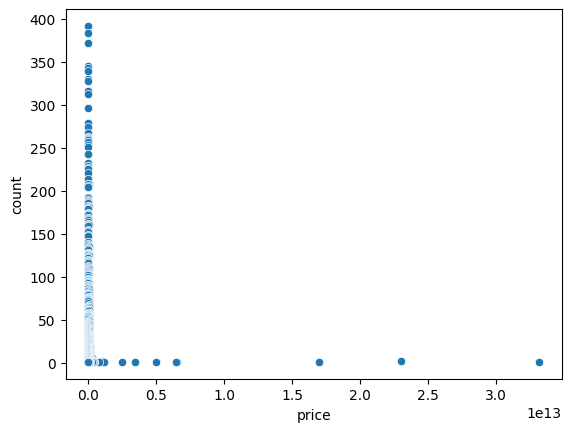

In [165]:
# attributes=['real_estate_area','total_rooms','price','number_of_parking']
sns.scatterplot(residental_mre['price'].value_counts())

<Axes: xlabel='price', ylabel='count'>

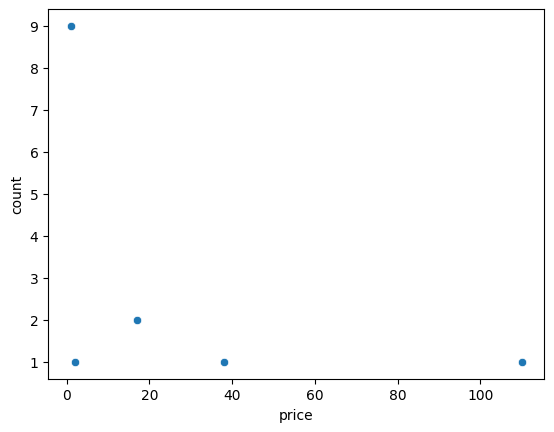

In [166]:
sns.scatterplot(residental_mre[residental_mre['price']<1000]['price'].value_counts())

In [167]:
residental_mre.drop(residental_mre[residental_mre['price_per_metre']<2e7].index,inplace=True)
residental_mre.drop(residental_mre[residental_mre['price_per_metre']>0.6e9].index,inplace=True)

In [168]:
index_age_year=residental_mre['real_estate_age'][residental_mre['real_estate_age']>1300].index
index_age_neg=residental_mre['real_estate_age'][residental_mre['real_estate_age']<0].index
residental_mre.loc[index_age_year,'real_estate_age']=residental_mre.loc[index_age_year,'real_estate_age'].apply(lambda x:1402-x)
residental_mre.loc[index_age_neg,'real_estate_age']=residental_mre.loc[index_age_neg,'real_estate_age'].apply(lambda x:-x)

In [169]:
residental_mre['number_of_parking'].value_counts()

number_of_parking
1     24524
0      7131
2      3075
3       678
5         9
6         2
60        1
22        1
10        1
36        1
Name: count, dtype: int64

<Axes: ylabel='real_estate_area'>

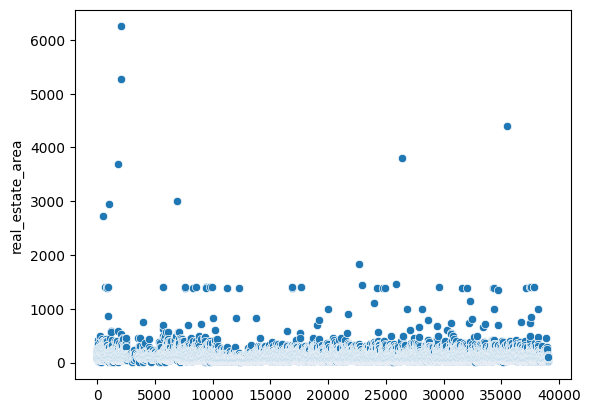

In [170]:
sns.scatterplot(residental_mre['real_estate_area'])

In [171]:
residental_mre['real_estate_area']<25

1        False
3        False
6        False
7        False
11       False
         ...  
39043    False
39044    False
39045    False
39046    False
39047    False
Name: real_estate_area, Length: 35423, dtype: bool

In [172]:
residental_mre.drop(residental_mre[residental_mre['real_estate_area']<=20].index,inplace=True)

In [175]:
residental_mre.drop(residental_mre[residental_mre['real_estate_area'].isna()].index,inplace=True)

In [ ]:
# def fill_total_rooms(residental=residental_mre['real_estate_area'],x):
#     area=[50,80,120,160,200]
#     for i,item in enumerate(area):
#         if residental<

In [ ]:
# residental_mre.drop(residental_mre[(residental_mre['total_rooms']>1)&(residental_mre['real_estate_area']<50)].index,inplace=True)
# residental_mre.drop(residental_mre[(residental_mre['total_rooms']>2)&(residental_mre['real_estate_area']<80)&(residental_mre['real_estate_area']>=50)].index,inplace=True)
# residental_mre.drop(residental_mre[(residental_mre['total_rooms']>3)&(residental_mre['real_estate_area']<120)&(residental_mre['real_estate_area']>=80)].index,inplace=True)
# residental_mre.drop(residental_mre[(residental_mre['total_rooms']>5)&(residental_mre['real_estate_area']<200)&(residental_mre['real_estate_area']>=120)].index,inplace=True)


In [176]:
residental_mre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35301 entries, 1 to 39047
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district_name      35301 non-null  object 
 1   real_estate_type   35301 non-null  object 
 2   real_estate_area   35301 non-null  float64
 3   total_rooms        34759 non-null  float64
 4   number_of_parking  35301 non-null  int64  
 5   real_estate_age    35041 non-null  float64
 6   price              35301 non-null  float64
 7   facilities         33281 non-null  object 
 8   floor              30943 non-null  float64
 9   price_per_metre    35301 non-null  float64
 10  آبنما              35301 non-null  int64  
 11  آسانسور            35301 non-null  int64  
 12  آلاچیق             35301 non-null  int64  
 13  اتاق مستر          35301 non-null  int64  
 14  استخر              35301 non-null  int64  
 15  اطفا حریق          35301 non-null  int64  
 16  اعلام حریق         35301 no

In [137]:
residental_mre[residental_mre['number_of_parking']>10]

,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,floor,price_per_metre,...,روف گاردن,سالن اجتماعات,سرایداری,سونا,لابی,لابی من,نورپردازی,نگهبانی,پارکینگ مهمان,پاسیو
2062,اندرزگو,برج,6250.0,3.0,60,1.0,1.500000e+11,"آسانسور,انباری,بالکن,سرایداری,نگهبانی,سالن اجت...",3.0,2.400000e+07,...,1,1,1,1,1,1,1,1,1,0
2965,شهرک راه آهن (شهرک گلستان),برج,115.0,2.0,22,1.0,1.166950e+10,"آسانسور,انباری,بالکن,سالن اجتماعات,لابی,استخر,...",2.0,1.014739e+08,...,0,1,0,1,1,0,0,0,0,0
7057,فرمانیه,برج,220.0,3.0,36,3.0,3.000000e+10,"آسانسور,انباری,بالکن,سرایداری,نگهبانی,سالن اجت...",3.0,1.363636e+08,...,1,1,1,1,1,1,1,1,1,0


In [135]:
residental_mre.columns

Index(['district_name', 'real_estate_type', 'real_estate_area', 'total_rooms',
       'number_of_parking', 'real_estate_age', 'price', 'facilities', 'floor',
       'price_per_metre', 'آبنما', 'آسانسور', 'آلاچیق', 'اتاق مستر', 'استخر',
       'اطفا حریق', 'اعلام حریق', 'انباری', 'باشگاه', 'بالکن',
       'جاروبرقی مرکزی', 'جکوزی', 'روف گاردن', 'سالن اجتماعات', 'سرایداری',
       'سونا', 'لابی', 'لابی من', 'نورپردازی', 'نگهبانی', 'پارکینگ مهمان',
       'پاسیو'],
      dtype='object')

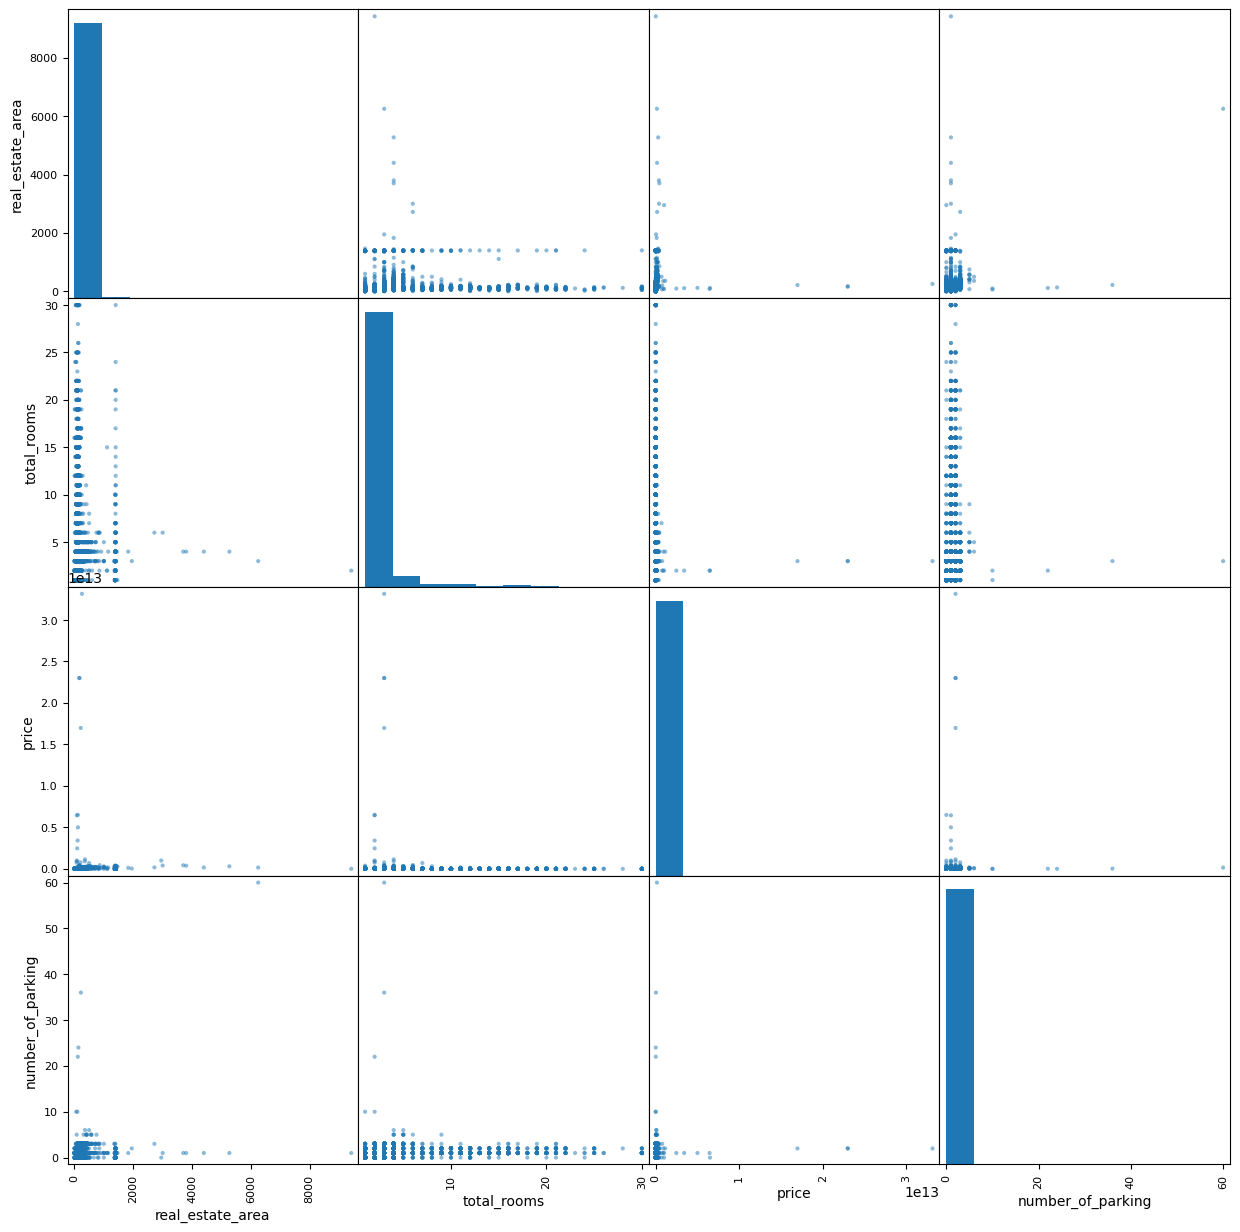

In [78]:
# plt.figure(figsize=(15,15))
from pandas.plotting import scatter_matrix
# ax,fig=plt.subplots(nrows=2,ncols=2)
attributes=['real_estate_area','total_rooms','price','number_of_parking']
scatter_matrix(residental_mre[attributes],figsize=(15,15));
# for i in range(4):

    
# sns.scatterplot(x=residental_mre[])

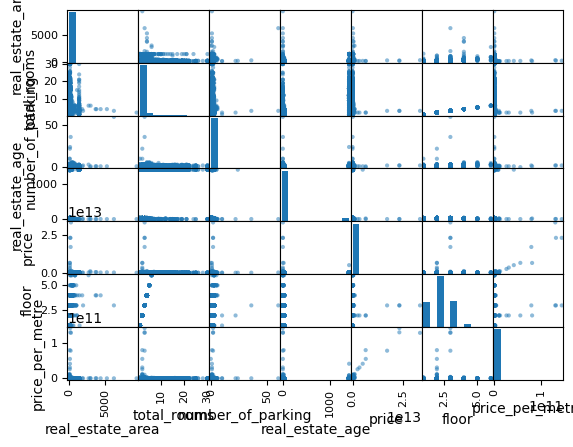

In [49]:
from pandas.plotting import scatter_matrix
scatter_matrix(mrestate_state);